## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [1]:
import pandas as pd

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [13]:
?pd.read_csv

Signature:
pd.read_csv(
    filepath_or_buffer: 'FilePath | ReadCsvBuffer[bytes] | ReadCsvBuffer[str]',
    *,
    sep: 'str | None | lib.NoDefault' = <no_default>,
    delimiter: 'str | None | lib.NoDefault' = None,
    header: "int | Sequence[int] | None | Literal['infer']" = 'infer',
    names: 'Sequence[Hashable] | None | lib.NoDefault' = <no_default>,
    index_col: 'IndexLabel | Literal[False] | None' = None,
    usecols=None,
    dtype: 'DtypeArg | None' = None,
    engine: 'CSVEngine | None' = None,
    converters=None,
    true_values=None,
    false_values=None,
    skipinitialspace: 'bool' = False,
    skiprows=None,
    skipfooter: 'int' = 0,
    nrows: 'int | None' = None,
    na_values=None,
    keep_default_na: 'bool' = True,
    na_filter: 'bool' = True,
    verbose: 'bool' = False,
    skip_blank_lines: 'bool' = True,
    parse_dates: 'bool | Sequence[Hashable] | None' = None,
    infer_datetime_format: 'bool | lib.NoDefault' = <no_default>,
    keep_date_col: 'bool' =

In [20]:
df = pd.read_csv("QueryResults.csv", header=0, names=["DATE", "TAG", "POSTS"])

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [21]:
df.head()

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,c,83
3,2008-08-01 00:00:00,c#,505
4,2008-08-01 00:00:00,c++,164


In [22]:
df.tail()

,DATE,TAG,POSTS
2463,2023-05-01 00:00:00,php,2158
2464,2023-05-01 00:00:00,python,12557
2465,2023-05-01 00:00:00,r,2921
2466,2023-05-01 00:00:00,ruby,260
2467,2023-05-01 00:00:00,swift,1056


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [23]:
df.shape

(2468, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [24]:
df.count()

DATE     2468
TAG      2468
POSTS    2468
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [28]:
posts_num = df[["TAG", "POSTS"]].groupby("TAG").sum()
posts_num.sort_values("POSTS", ascending=False).head()

,POSTS
TAG,
javascript,2493650
python,2134846
java,1896321
c#,1591577
php,1457775


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [30]:
months = df[["DATE", "TAG"]].groupby("TAG").count()
months.sort_values("DATE").head()

,DATE
TAG,
go,163
swift,170
r,176
assembly,178
c,178


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [33]:
df["date"] = pd.to_datetime(df.DATE)

In [34]:
df.head()

,DATE,TAG,POSTS,date
0,2008-07-01 00:00:00,c#,3,2008-07-01
1,2008-08-01 00:00:00,assembly,8,2008-08-01
2,2008-08-01 00:00:00,c,83,2008-08-01
3,2008-08-01 00:00:00,c#,505,2008-08-01
4,2008-08-01 00:00:00,c++,164,2008-08-01


In [36]:
clean_df = df.drop(columns=["DATE"])

In [37]:
clean_df

,TAG,POSTS,date
0,c#,3,2008-07-01
1,assembly,8,2008-08-01
2,c,83,2008-08-01
3,c#,505,2008-08-01
4,c++,164,2008-08-01
...,...,...,...
2463,php,2158,2023-05-01
2464,python,12557,2023-05-01
2465,r,2921,2023-05-01
2466,ruby,260,2023-05-01


## Data Manipulation



In [53]:
test_df = pd.DataFrame({'Age': ['Young', 'Young', 'Young', 'Young', 'Old', 'Old', 'Old', 'Old'],
                        'Actor': ['Jack', 'Arnold', 'Keanu', 'Sylvester', 'Jack', 'Arnold', 'Keanu', 'Sylvester'],
                        'Power': [100, 80, 25, 50, 99, 75, 5, 30]})
test_df

,Age,Actor,Power
0,Young,Jack,100
1,Young,Arnold,80
2,Young,Keanu,25
3,Young,Sylvester,50
4,Old,Jack,99
5,Old,Arnold,75
6,Old,Keanu,5
7,Old,Sylvester,30


In [56]:
test_df.pivot(index="Age", columns="Actor", values="Power")

Actor,Arnold,Jack,Keanu,Sylvester
Age,,,,
Old,75,99,5,30
Young,80,100,25,50


**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [57]:
reshaped_df = clean_df.pivot(index="date", columns="TAG", values="POSTS")

In [60]:
reshaped_df = reshaped_df.fillna(0)

In [61]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
date,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,83.0,505.0,164.0,14.0,0.0,222.0,163.0,28.0,158.0,120.0,0.0,70.0,0.0
2008-09-01,28.0,319.0,1641.0,754.0,104.0,0.0,1129.0,634.0,130.0,475.0,536.0,6.0,287.0,0.0
2008-10-01,16.0,302.0,1988.0,807.0,112.0,0.0,1149.0,722.0,128.0,610.0,506.0,0.0,247.0,0.0
2008-11-01,16.0,258.0,1731.0,734.0,141.0,0.0,956.0,580.0,97.0,499.0,449.0,1.0,157.0,0.0


In [62]:
reshaped_df.shape

(179, 14)

In [66]:
reshaped_df.isna().values.any()

False

In [38]:
clean_df.shape

(2468, 3)

In [39]:
clean_df.columns

Index(['TAG', 'POSTS', 'date'], dtype='object')

In [40]:
clean_df.head()

,TAG,POSTS,date
0,c#,3,2008-07-01
1,assembly,8,2008-08-01
2,c,83,2008-08-01
3,c#,505,2008-08-01
4,c++,164,2008-08-01


**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [42]:
clean_df.groupby("TAG").count().sort_values("POSTS").head()

,POSTS,date
TAG,,
go,163,163
swift,170,170
r,176,176
assembly,178,178
c,178,178


## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

In [44]:
timeline = clean_df["date"][clean_df["TAG"] == "assembly"]
posts = clean_df["POSTS"][clean_df["TAG"] == "assembly"]

In [46]:
import matplotlib.pyplot as plt

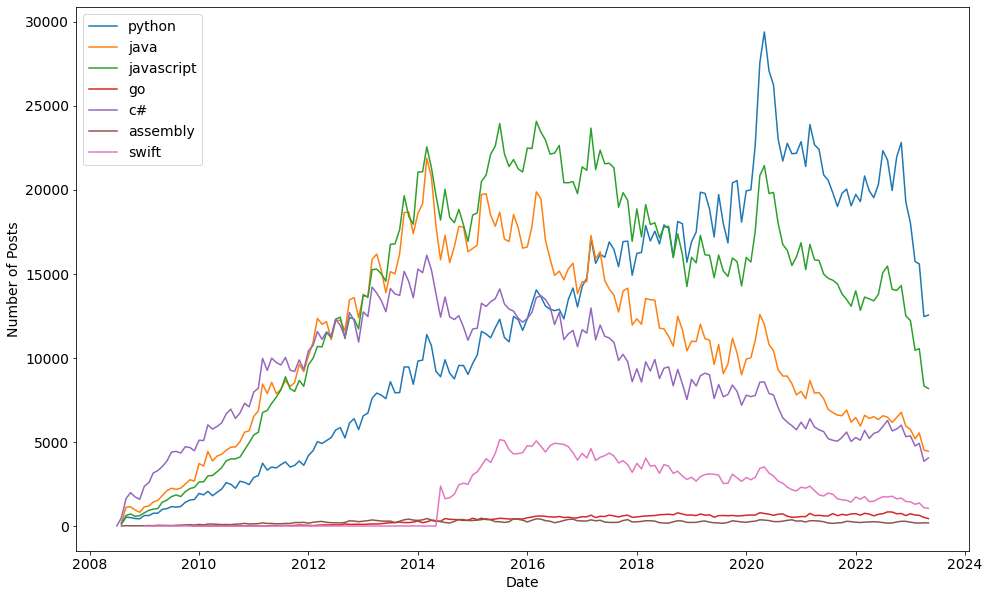

In [69]:
plt.figure(figsize=(16, 10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Number of Posts", fontsize=14)
languages = ["python", "java", "javascript", "go", "c#", "assembly", "swift"]
for lang in languages:
    plt.plot(clean_df["date"][clean_df["TAG"] == lang], clean_df["POSTS"][clean_df["TAG"] == lang])
# plt.plot(clean_df["date"][clean_df["TAG"] == "assembly"], clean_df["POSTS"][clean_df["TAG"] == "assembly"])
# plt.plot(clean_df["date"][clean_df["TAG"] == "java"], clean_df["POSTS"][clean_df["TAG"] == "java"])
plt.legend(languages, fontsize=14)

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')


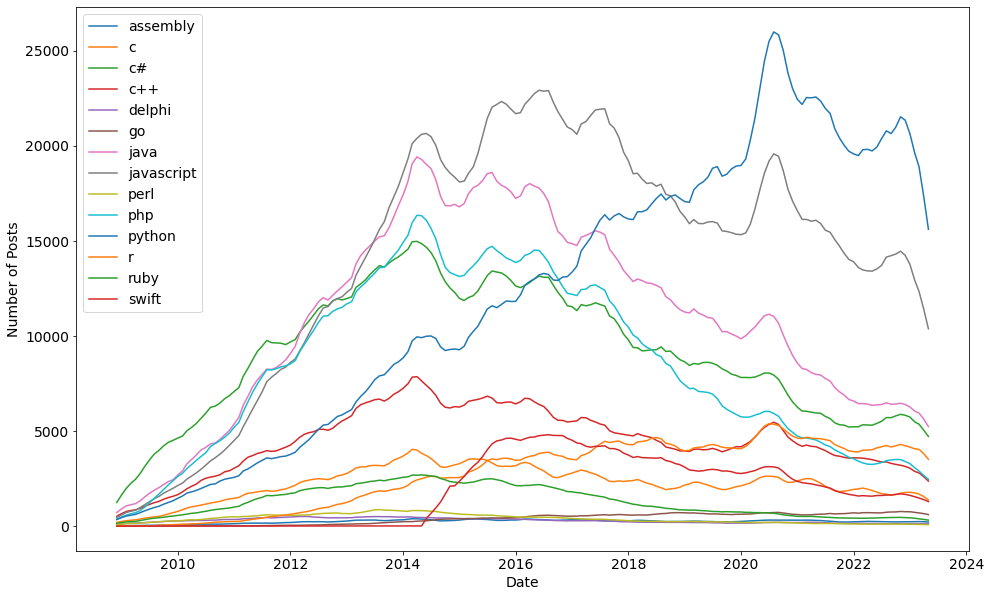

In [78]:
roll_df = reshaped_df.rolling(window=6).mean()

plt.figure(figsize=(16, 10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Number of Posts", fontsize=14)
print(reshaped_df.columns)
for lang in reshaped_df.columns:
    plt.plot(reshaped_df.index, roll_df[lang])
plt.legend(reshaped_df.columns, fontsize=14)

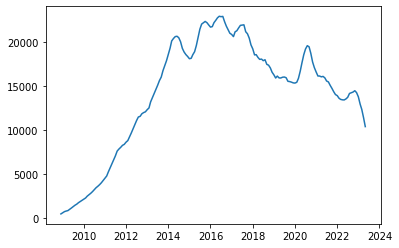

In [79]:
plt.plot(reshaped_df.index, roll_df.javascript)

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

In [77]:
roll_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
date,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 